# Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()

import tqdm

import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

In [2]:
df = pd.read_pickle('creditcard.pkl')

## Analisando as distribuições das variáveis importantes para poder criar od dummies binários

In [3]:
# Variáveis selecionadas 
# 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10'
# 'V11','V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21

# Função para plotar a distribuição das variáveis selecionadas e seus respectivos quartis (geral)
def metricas_df(df, feature, hue, mark=False, x_limits=False):
    
    print(f'\n ========== Métricas para cada classe em {feature} ========== \n')
    display(df.groupby(hue, as_index=False).describe()[feature])
    
    print(f'\n ========== Distribuição para cada classe em {feature} ========== \n')

    fig, ax = plt.subplots(figsize=(20,8))
        
    sns.distplot(df[feature][df['Class'] == 1], bins=50, color='r') # Fraudulenta --> vermelho
    sns.distplot(df[feature][df['Class'] == 0], bins=50) # Não-fraudulenta --> azul
            
    plt.axvline([df[feature].mean()], color='magenta', linestyle='dashed', linewidth=2) # Média
    plt.axvline(df[feature].median(), color='green', linestyle='dashed', linewidth=2) # Mediana
    
    quantile = list(df[feature].quantile([0.05, 0.95]))
    plt.axvline(quantile[0], color='grey', linestyle='dashed', linewidth=2) # Quantile 0.25
    plt.axvline(quantile[1], color='grey', linestyle='dashed', linewidth=2) # Quantile 0.75
    
    if mark!=False:
        # Marcação para descobrir a região onde as distribioções se diferenciam
        plt.axvline(mark, color='black', linestyle='dashed', linewidth=4)
        
    if x_limits!=False:
        plt.xlim(x_limits)
    
    plt.legend(labels=['Fraudulenta', 'Não-Fraudulenta', 'Média geral', 'Mediana geral',\
                       'Quartils (25% e 75%) geral'])
    plt.show()
    
    return (feature, quantile)


 ========== Métricas para cada classe em V1 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.008258,1.929814,-56.40751,-0.917544,0.020023,1.316218,2.454930
1,492.0,-4.771948,6.783687,-30.55238,-6.036063,-2.342497,-0.419200,2.132386



 ========== Distribuição para cada classe em V1 ========== 



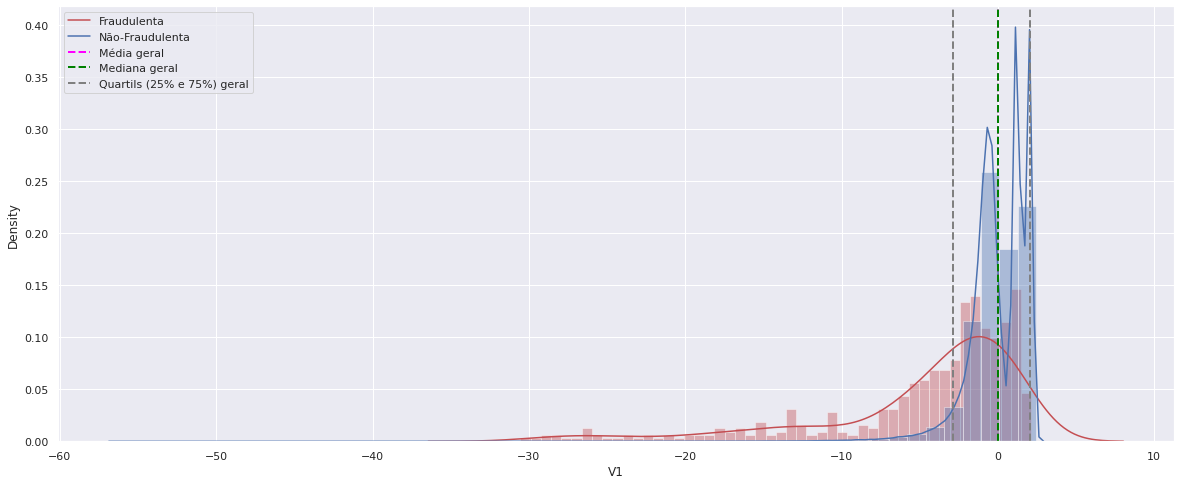

('V1', [-2.8991467698557107, 2.0812230593316863])



 ========== Métricas para cada classe em V2 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
1,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729



 ========== Distribuição para cada classe em V2 ========== 



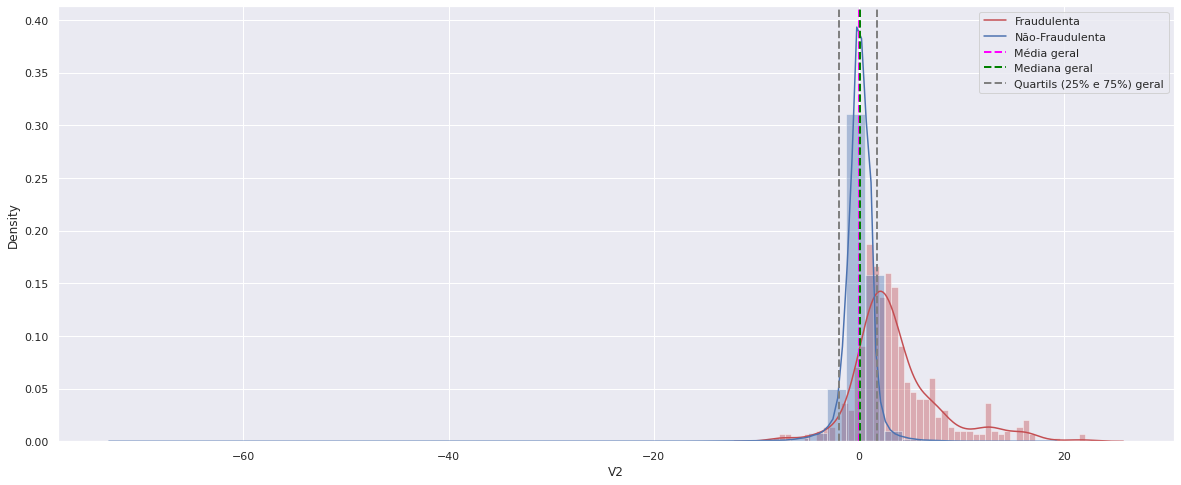

('V2', [-1.9719751442059017, 1.808584753676])



 ========== Métricas para cada classe em V3 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
1,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210



 ========== Distribuição para cada classe em V3 ========== 



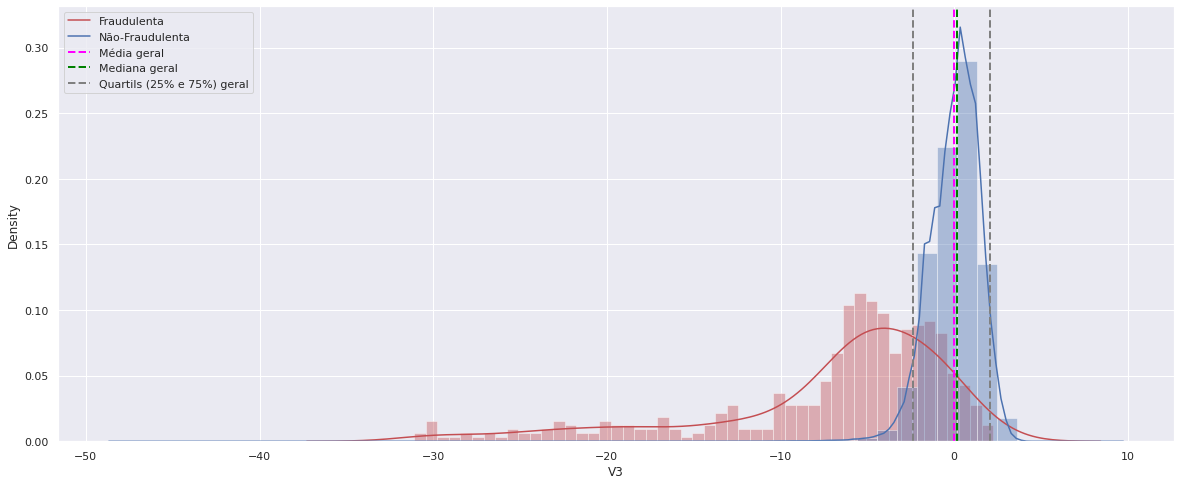

('V3', [-2.389740464115552, 2.0626351429708314])



 ========== Métricas para cada classe em V4 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
1,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672



 ========== Distribuição para cada classe em V4 ========== 



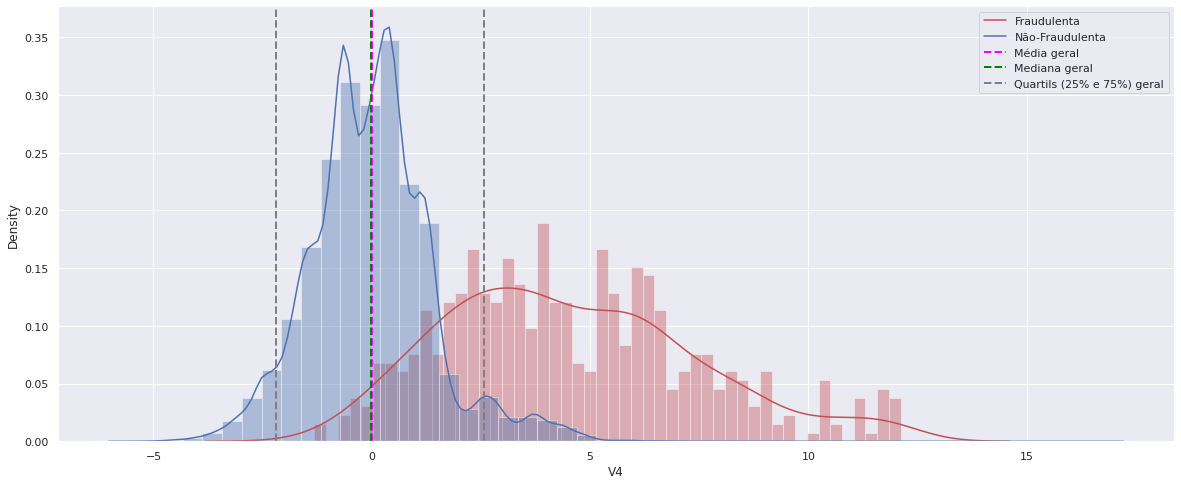

('V4', [-2.1956828223899576, 2.566500655715263])



 ========== Métricas para cada classe em V5 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
1,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089



 ========== Distribuição para cada classe em V5 ========== 



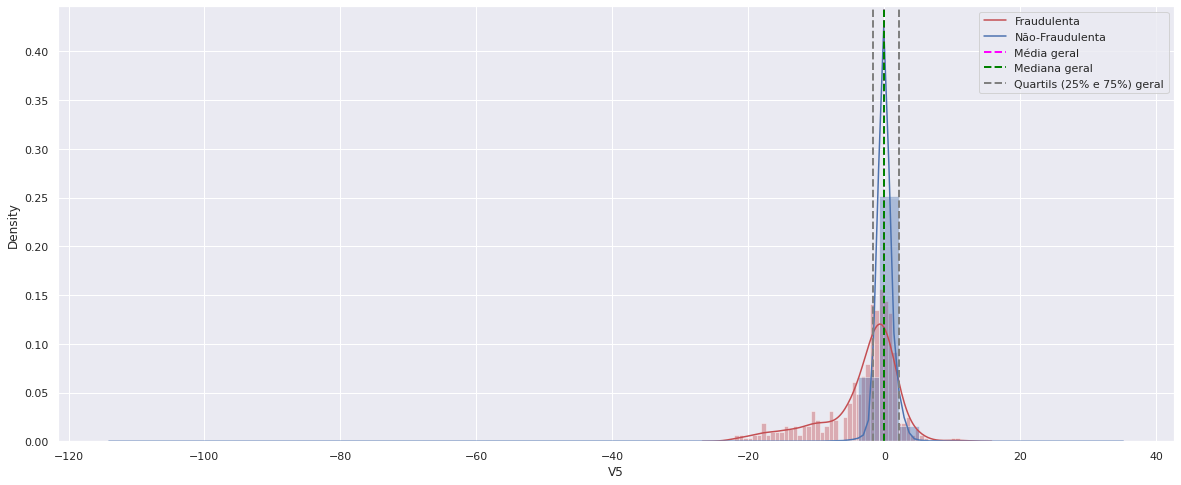

('V5', [-1.7020214545577308, 2.0989596746157626])



 ========== Métricas para cada classe em V6 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
1,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115



 ========== Distribuição para cada classe em V6 ========== 



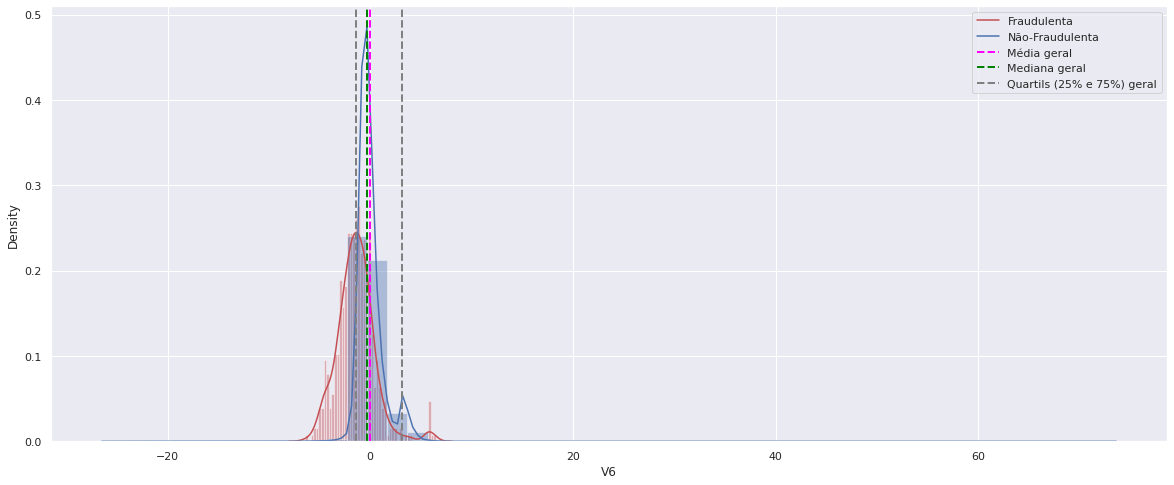

('V6', [-1.406757262421906, 3.1603816957500124])



 ========== Métricas para cada classe em V7 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
1,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537



 ========== Distribuição para cada classe em V7 ========== 



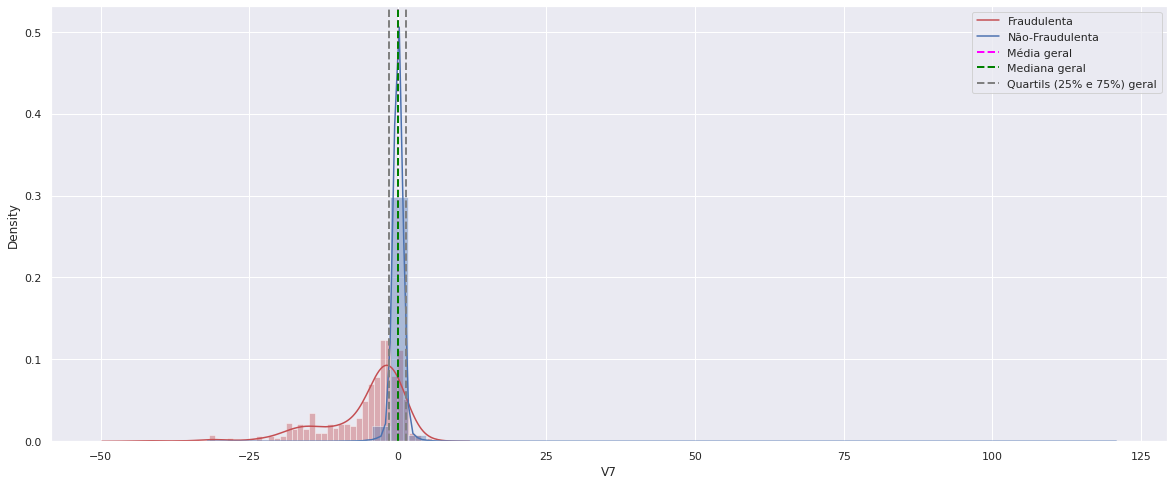

('V7', [-1.4344230435873628, 1.4076321081384824])



 ========== Métricas para cada classe em V9 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.59823,15.594995
1,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.78785,3.353525



 ========== Distribuição para cada classe em V9 ========== 



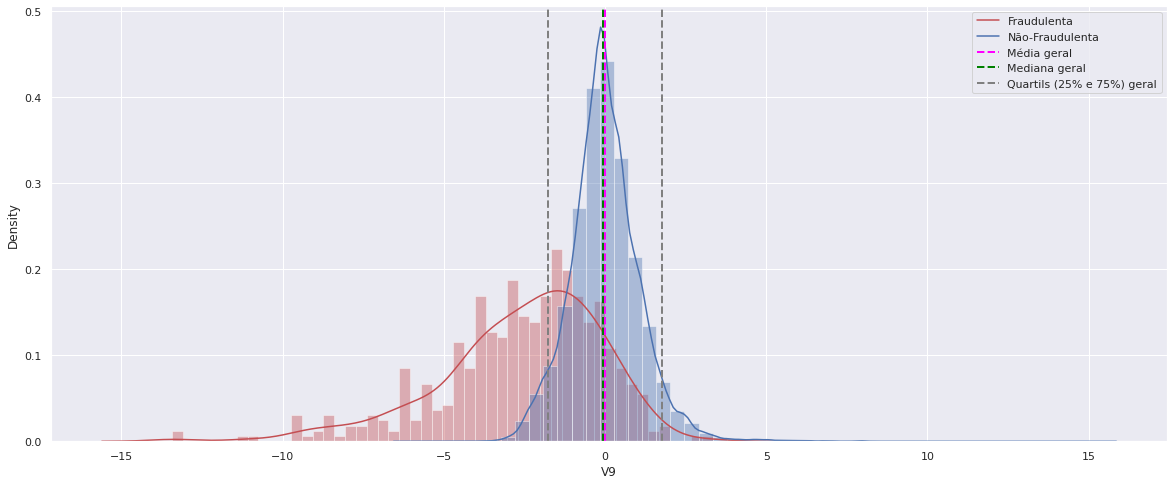

('V9', [-1.758426018419133, 1.780782629851807])



 ========== Métricas para cada classe em V10 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.009824,1.044204,-14.741096,-0.532880,-0.091872,0.455135,23.745136
1,492.0,-5.676883,4.897341,-24.588262,-7.756698,-4.578825,-2.614184,4.031435



 ========== Distribuição para cada classe em V10 ========== 



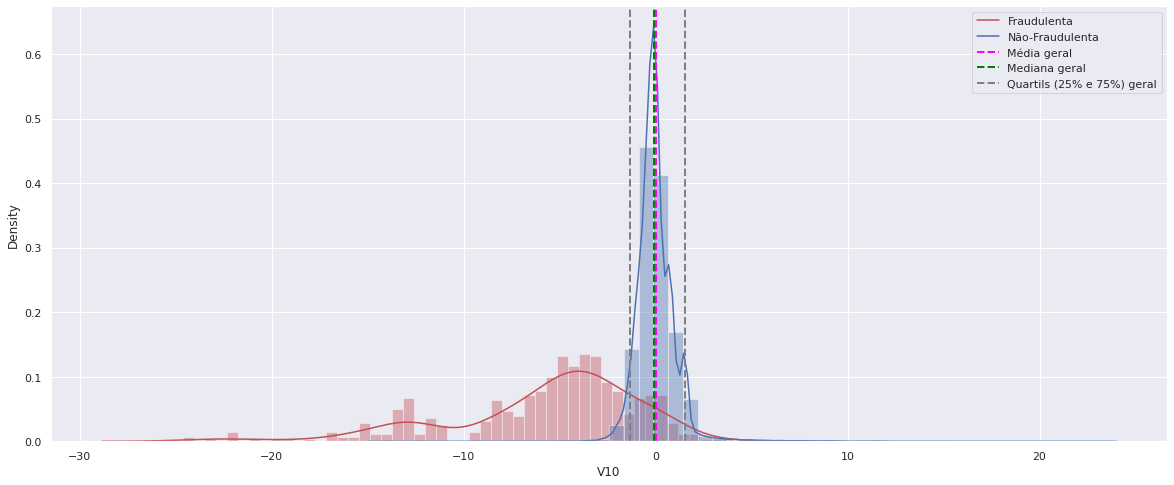

('V10', [-1.338635689443749, 1.548557435505609])



 ========== Métricas para cada classe em V11 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,-0.006576,1.003112,-4.797473,-0.763447,-0.034923,0.736362,10.002190
1,492.0,3.800173,2.678605,-1.702228,1.973397,3.586218,5.307078,12.018913



 ========== Distribuição para cada classe em V11 ========== 



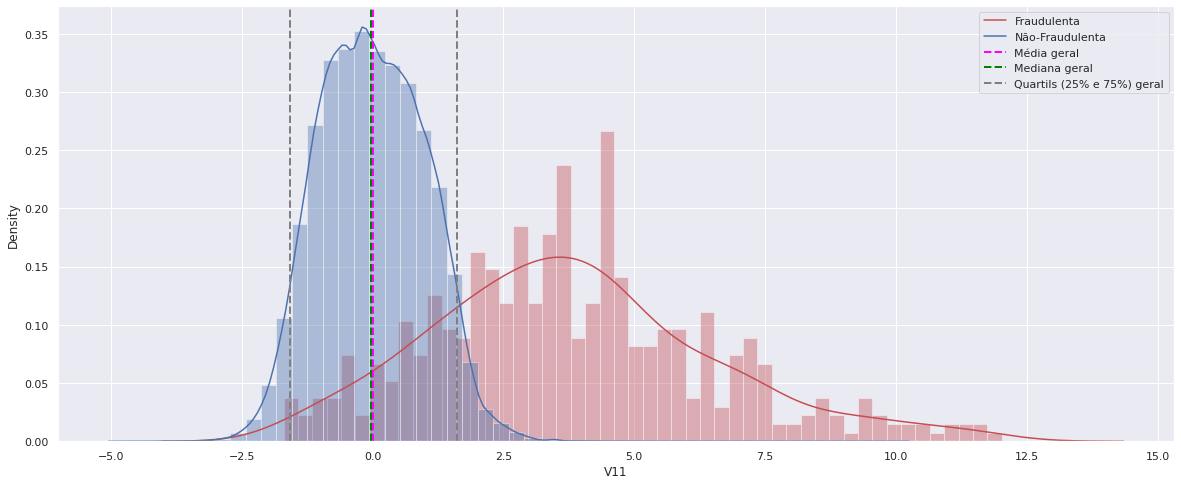

('V11', [-1.571901244826525, 1.6140328230418985])



 ========== Métricas para cada classe em V12 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.010832,0.945939,-15.144988,-0.402102,0.141679,0.619207,7.848392
1,492.0,-6.259393,4.654458,-18.683715,-8.688177,-5.502530,-2.974088,1.375941



 ========== Distribuição para cada classe em V12 ========== 



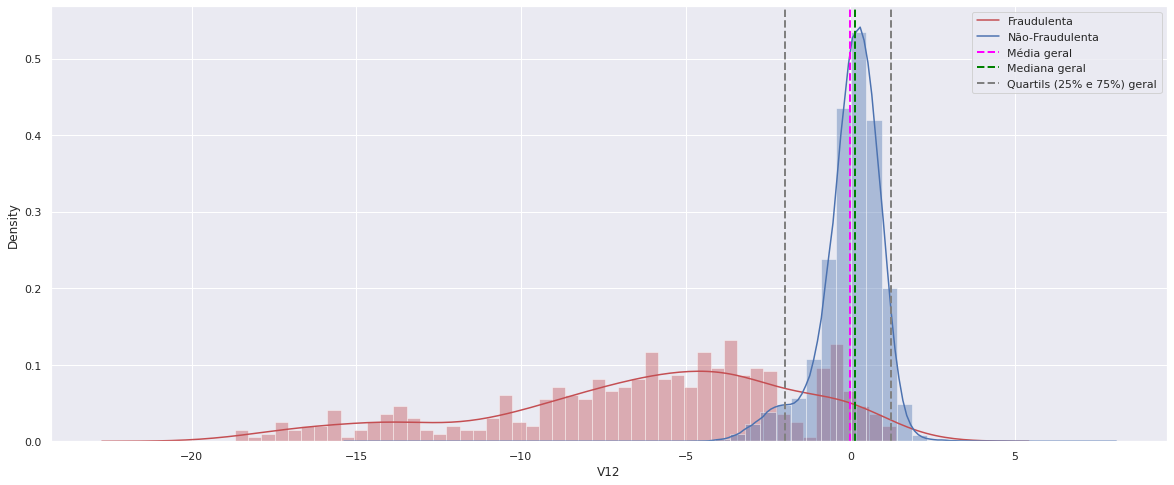

('V12', [-1.967162457978426, 1.2430531225689905])



 ========== Métricas para cada classe em V14 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.012064,0.897007,-18.392091,-0.422453,0.051947,0.494104,10.526766
1,492.0,-6.971723,4.278940,-19.214325,-9.692723,-6.729720,-4.282821,3.442422



 ========== Distribuição para cada classe em V14 ========== 



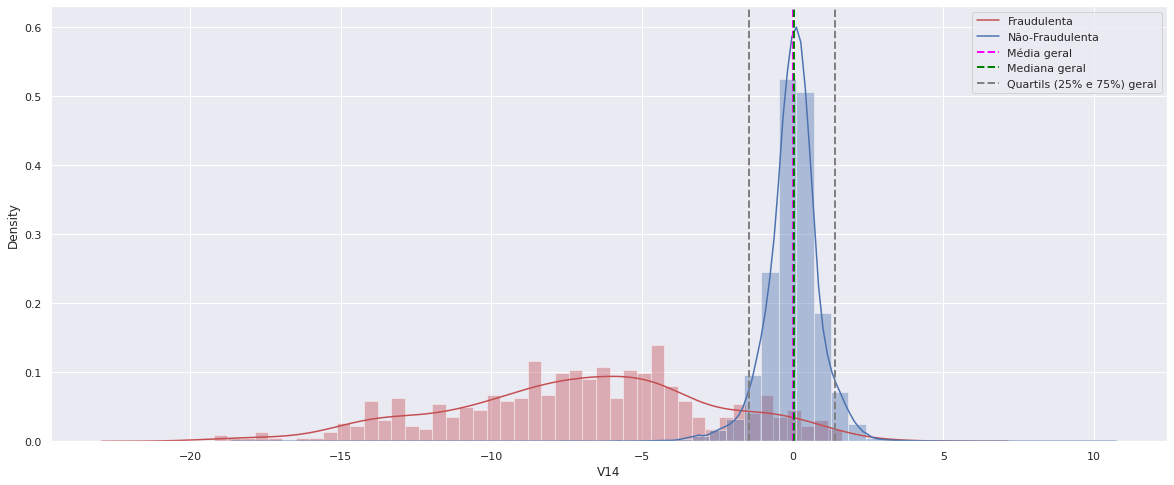

('V14', [-1.439351463290727, 1.3936534501631264])



 ========== Métricas para cada classe em V16 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.007164,0.844772,-10.115560,-0.465543,0.067377,0.523738,17.315112
1,492.0,-4.139946,3.865035,-14.129855,-6.562915,-3.549795,-1.226043,3.139656



 ========== Distribuição para cada classe em V16 ========== 



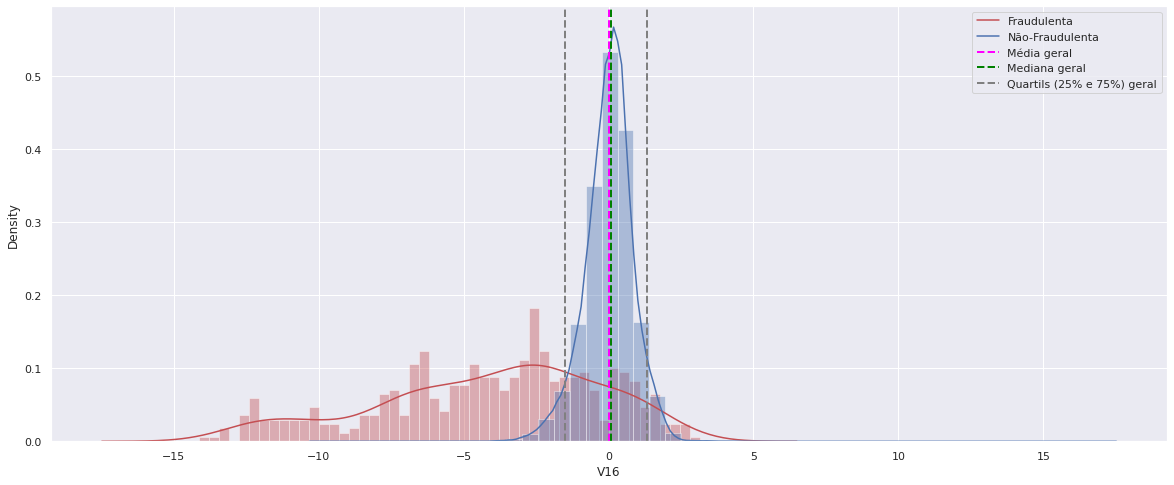

('V16', [-1.491663295167961, 1.3252531870371844])



 ========== Métricas para cada classe em V17 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.011535,0.749457,-17.098444,-0.482644,-0.064833,0.399922,9.253526
1,492.0,-6.665836,6.970618,-25.162799,-11.945057,-5.302949,-1.341940,6.739384



 ========== Distribuição para cada classe em V17 ========== 



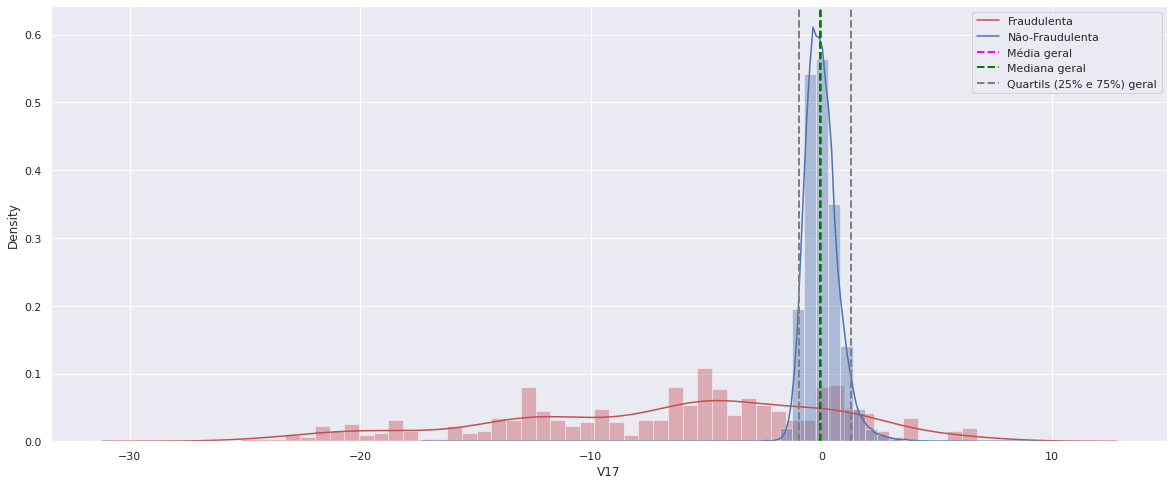

('V17', [-0.9830039027779043, 1.2746091170550946])



 ========== Métricas para cada classe em V18 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,0.003887,0.824919,-5.366660,-0.497414,-0.002787,0.501103,5.041069
1,492.0,-2.246308,2.899366,-9.498746,-4.664576,-1.664346,0.091772,3.790316



 ========== Distribuição para cada classe em V18 ========== 



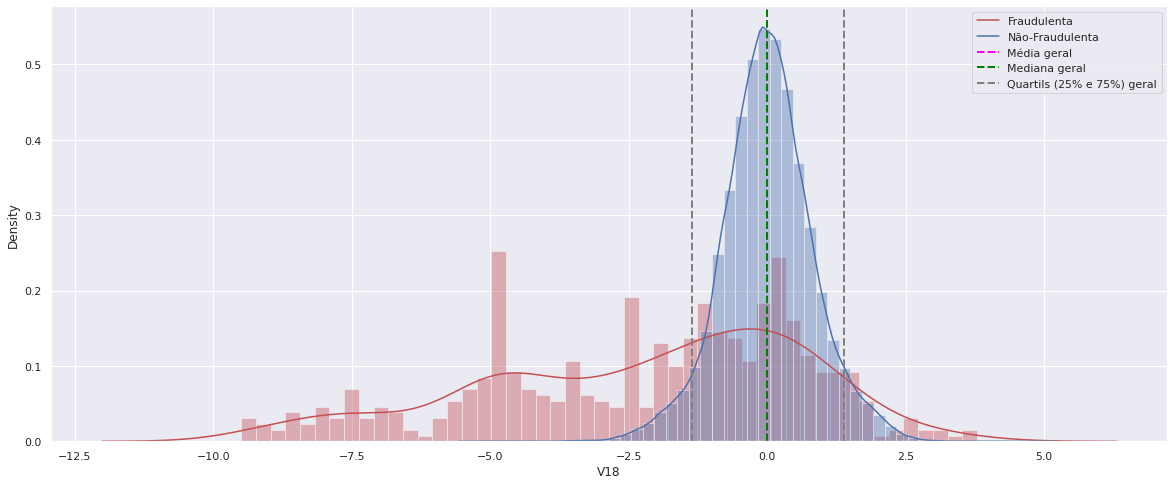

('V18', [-1.358094019498378, 1.3943918031212992])



 ========== Métricas para cada classe em V19 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,-0.001178,0.811733,-7.213527,-0.456366,0.003117,0.457499,5.591971
1,492.0,0.680659,1.539853,-3.681904,-0.299423,0.646807,1.649318,5.228342



 ========== Distribuição para cada classe em V19 ========== 



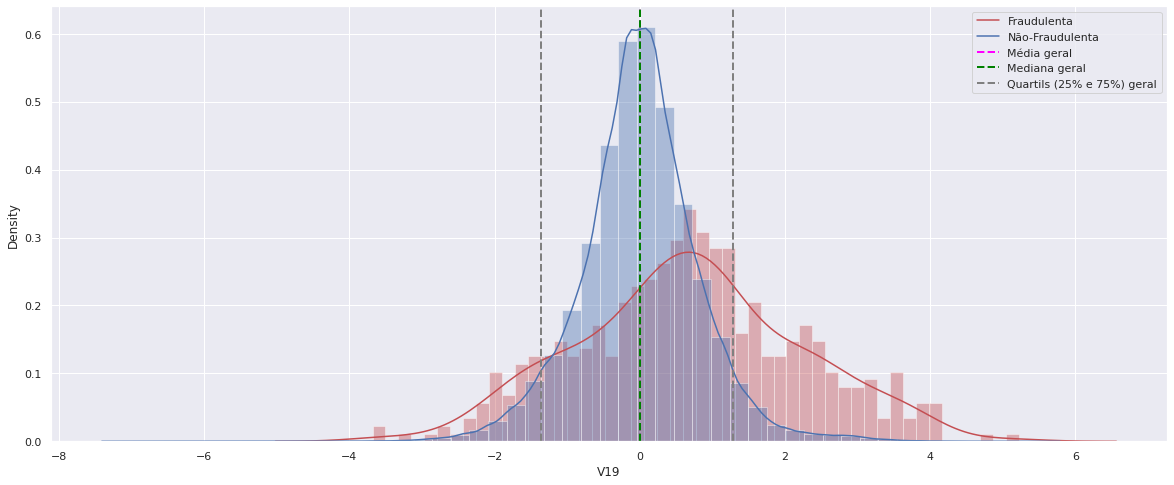

('V19', [-1.35625896340256, 1.286164482396645])



 ========== Métricas para cada classe em V21 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,-0.001235,0.716743,-34.830382,-0.228509,-0.029821,0.185626,22.614889
1,492.0,0.713588,3.869304,-22.797604,0.041787,0.592146,1.244611,27.202839



 ========== Distribuição para cada classe em V21 ========== 



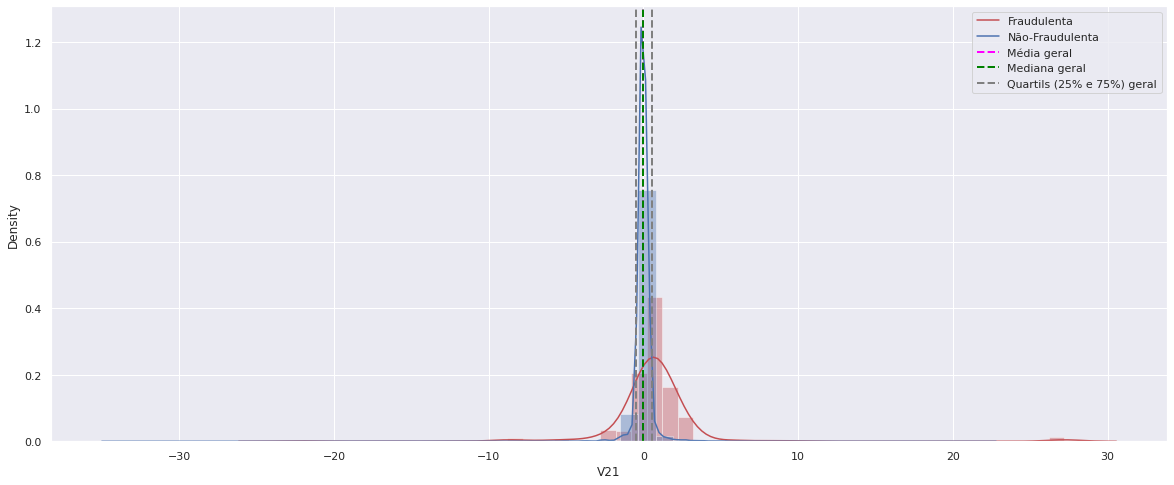

('V21', [-0.5046735037495382, 0.5378677105558742])




In [4]:
# Features (colunas) selecionadas para analisar os quartis
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10',\
        'V11','V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21']

list_quartils = [] # lista para armazenar cada quaril

# Iterando para cada feature (coluna)
for i in cols:
    quartils = metricas_df(df=df, feature=i, hue='Class')
    list_quartils.append(quartils)
    print(quartils)
    print()
    print()


 ========== Métricas para cada classe em V11 ========== 



,count,mean,std,min,25%,50%,75%,max
0,284315.0,-0.006576,1.003112,-4.797473,-0.763447,-0.034923,0.736362,10.002190
1,492.0,3.800173,2.678605,-1.702228,1.973397,3.586218,5.307078,12.018913



 ========== Distribuição para cada classe em V11 ========== 



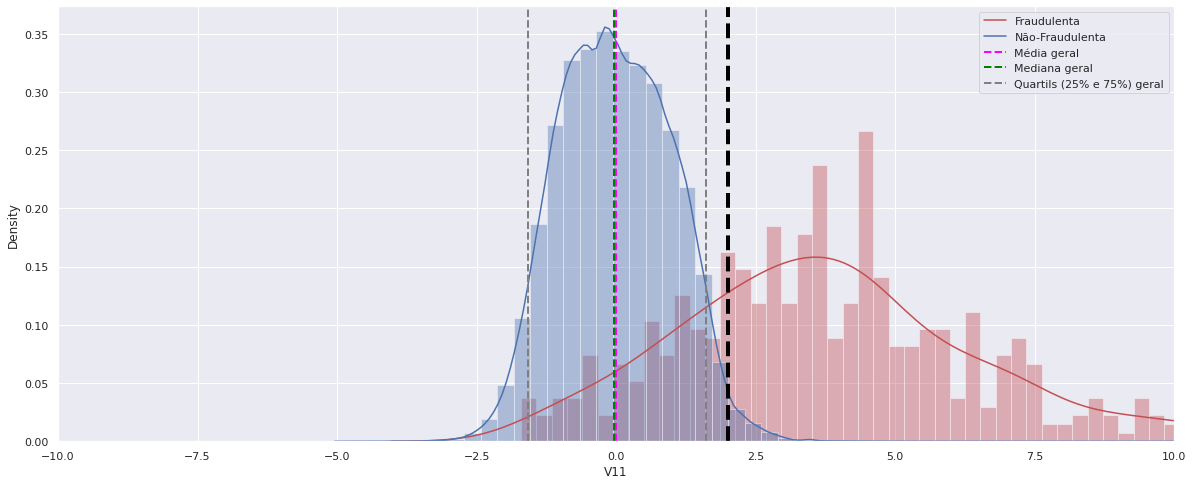

('V11', [-1.571901244826525, 1.6140328230418985])

In [5]:
df = df
hue = 'Class'

feature = 'V11'
mark = 2
x_limits = (-10,10)

metricas_df(df, feature, hue, mark, x_limits)

Baseando-se no gráficos acima, podemos definir as regioes que se diferenciam entre fraudulentas e não-fraudulentas, e a partir daí, criaremos dummies para evidenciar essa diferença.


In [6]:
df_mod = df.copy()

In [7]:
df_mod['V1_mod'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df_mod['V2_mod'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df_mod['V3_mod'] = df.V3.map(lambda x: 1 if x < -3.5 else 0)
df_mod['V4_mod'] = df.V4.map(lambda x: 1 if x > 2 else 0)
df_mod['V5_mod'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df_mod['V6_mod'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V7_mod'] = df.V7.map(lambda x: 1 if x < -1.5 else 0)
df_mod['V9_mod'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df_mod['V10_mod'] = df.V10.map(lambda x: 1 if x < -2 else 0)
df_mod['V11_mod'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df_mod['V12_mod'] = df.V12.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V14_mod'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V16_mod'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df_mod['V17_mod'] = df.V17.map(lambda x: 1 if (x < -2) | (x > 2) else 0)
df_mod['V18_mod'] = df.V18.map(lambda x: 1 if (x < -2) | (x > 2) else 0)
df_mod['V19_mod'] = df.V19.map(lambda x: 1 if (x > 1.5) | (x < -1.75) else 0)
df_mod['V21_mod'] = df.V21.map(lambda x: 1 if x > 0.3 else 0)

In [8]:
df_mod.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9_mod,V10_mod,V11_mod,V12_mod,V14_mod,V16_mod,V17_mod,V18_mod,V19_mod,V21_mod
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,0,0,0,0,1,0,0,1,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,0,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,0,0,0,0,0,0,0,0,0
